# RANDOM FOREST

In [6]:

# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  


In [8]:
#importing datasets  
data_set = pd.read_csv(r"C:\Users\Admin\Desktop\Dataset\User_Data.csv")
data_set


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [9]:
#input data_set: This is the pandas DataFrame that you previously loaded from the CSV file.

#iloc: Stands for "integer location" and is used for integer-location based indexing. It allows you to select rows and columns by their integer index.

#[:, [2, 3]]: This part specifies the selection of rows and columns. The colon : before the comma refers to all rows in the DataFrame. The list [2, 3] after the comma specifies that you want to select columns with integer indices 2 and 3.

#.values: This converts the selected subset of the DataFrame into a NumPy array. It retrieves the values of the specified rows and columns.

#So, in summary, the code is creating a new variable x that contains the values from columns 2 and 3 of the DataFrame data_set. The resulting x is a NumPy array with the selected values.

#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
x


array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [10]:
y= data_set.iloc[:, 4].values 
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [12]:

#This code is using the train_test_split function from the scikit-learn library in Python to split your dataset into training and testing sets. Let me break down the code for you:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
#train_test_split: This function is used to split arrays or matrices into random train and test subsets. In your case, it is splitting the input features (x) and corresponding labels/targets (y) into training and testing sets.

#x: This is the input feature matrix (usually a NumPy array or pandas DataFrame) that you want to split.

#y: This is the target variable or label associated with each row in the feature matrix x. It represents the output you are trying to predict.

#test_size=0.25: This parameter specifies the proportion of the dataset to include in the test split. Here, 25% of the data will be used for testing, and the remaining 75% will be used for training.

#random_state=0: This parameter sets a seed for the random number generator. Setting a seed ensures reproducibility, meaning if you run the code multiple times with the same seed, you'll get the same split every time. The specific value (0 in this case) is arbitrary; you can use any integer.

#After executing this code, you will have four sets of data: x_train (features for training), x_test (features for testing), y_train (labels for training), and y_test (labels for testing). These sets are used for training and evaluating machine learning models.

# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
  
  

In [13]:
#StandardScaler: This is a class in scikit-learn used for standardization. It scales the features by removing the mean and scaling to unit variance.

#st_x = StandardScaler(): This line creates an instance of the StandardScaler class.
#x_train = st_x.fit_transform(x_train): It fits the scaler to the training data (x_train) and then transforms the training data using the calculated mean and standard deviation. The fit_transform method is used for the initial fitting and transforming in one step.
#x_test = st_x.transform(x_test): It transforms the test data (x_test) using the same scaling parameters (mean and standard deviation) learned from the training data. This ensures consistency in the scaling between the training and test sets.
#By standardizing the features, you make sure that they have zero mean and unit variance, which can be important for certain machine learning algorithms, especially those that are sensitive to the scale of the input features, like many distance-based algorithms.

#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [14]:
x_train

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358],
       [ 1.47293972,  0.99784738],
       [ 0.08648817, -0.79972756],
       [-0.01254409, -0.24885782],
       [-0.21060859, -0.5677824 ],
       [-0.21060859, -0.19087153],
       [-0.30964085, -1.29261101],
       [-0.30964085, -0.5677824 ],
       [ 0.38358493,  0.09905991],
       [ 0.8787462 , -0.59677555],
       [ 2.06713324, -1.17663843],
       [ 1.07681071, -0.13288524],
       [ 0.68068169,  1.78066227],
       [-0.70576986,  0.56295021],
       [ 0.77971394,  0.35999821],
       [ 0.8787462 , -0.53878926],
       [-1.20093113, -1.58254245],
       [ 2.1661655 ,  0.93986109],
       [-0.01254409,  1.22979253],
       [ 0.18552042,  1.08482681],
       [ 0.38358493, -0.48080297],
       [-0.30964085, -0.30684411],
       [ 0.97777845, -0.8287207 ],
       [ 0.97777845,  1.8676417 ],
       [-0.01254409,

In [15]:
x_test


array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ],
       [-0.30964085,  0.1570462 ],
       [-0.80480212,  0.27301877],
       [-0.30964085, -0.5677824 ],
       [-1.10189888, -1.43757673],
       [-0.70576986, -1.58254245],
       [-0.21060859,  2.15757314],
       [-1.99318916, -0.04590581],
       [ 0.8787462 , -0.77073441],
       [-0.80480212, -0.59677555],
       [-1.00286662, -0.42281668],
       [-0.11157634, -0.42281668],
       [ 0.08648817,  0.21503249],
       [-1.79512465,  0.47597078],
       [-0.60673761,  1.37475825],
       [-0.11157634,  0.21503249],
       [-1.89415691,  0.44697764],
       [ 1.67100423,  1.75166912],
       [-0.30964085, -1.37959044],
       [-0.30964085, -0.65476184],
       [ 0.8787462 ,  2.15757314],
       [ 0.28455268, -0.53878926],
       [ 0.8787462 ,  1.02684052],
       [-1.49802789, -1.20563157],
       [ 1.07681071,  2.07059371],
       [-1.00286662,  0.50496393],
       [-0.90383437,  0.30201192],
       [-0.11157634,

In [16]:
#RandomForestClassifier: This is an ensemble learning method in scikit-learn that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
#n_estimators=10: This parameter specifies the number of decision trees in the forest. In this case, the classifier is set to use 10 decision trees.
#criterion="entropy": This parameter specifies the function to measure the quality of a split. "Entropy" is a measure of impurity used to guide the construction of the decision trees in the forest.
#classifier.fit(x_train, y_train): This line fits the Random Forest classifier to the training data. It uses the features (x_train) and corresponding labels/targets (y_train) to train the model.

#After executing this code, the classifier variable contains a trained Random Forest classifier that can be used for making predictions on new data.
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [18]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [21]:
#Creating the Confusion matrix to determine the correct and incorrect predictions
#As we can see in the above matrix, there are 4+4= 8 incorrect predictions and 64+28= 92 correct predictions.
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm


array([[64,  4],
       [ 5, 27]], dtype=int64)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21232\600226820.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


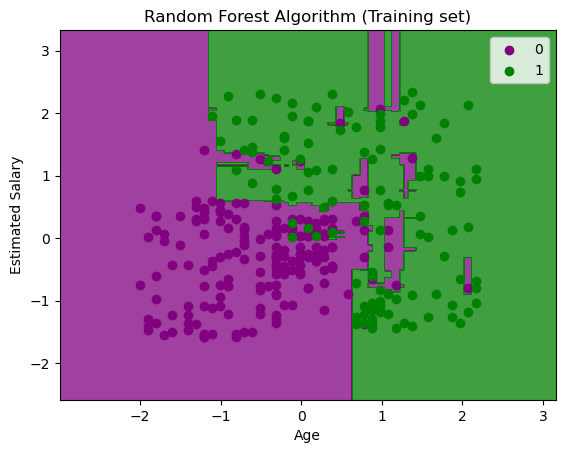

In [22]:
#To visualize the training set result we will plot a graph for the Random forest classifier. 
#The classifier will predict yes or No for the users who have either Purchased or Not purchased the SUV car as we did in Logistic Regression. 

from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Random Forest Algorithm (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  